cyl         float64
disp        float64
hp          float64
wt          float64
acc         float64
yr            int64
origin        int64
cyl_disp    float64
dtype: object


C:\Users\aadih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


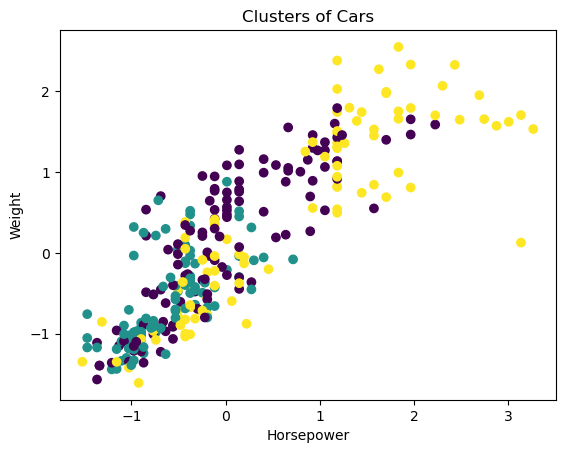

Mean Absolute Error: 1.7687025064689421
Predictions for cluster 0:
276    24.397345
205    28.901416
235    28.962441
152    18.717987
210    21.128916
289    15.696824
167    28.315612
277    18.624872
125    19.098090
142    29.267179
102    29.338428
157    13.720147
257    20.672828
291    18.922032
147    27.978201
143    26.776601
159    12.632960
197    29.924484
134    15.813078
165    19.119943
169    20.025791
194    20.230220
178    23.358209
183    27.544434
255    25.028239
175    29.414956
249    20.010056
241    22.637210
dtype: float64
--------------------------------------------------
Predictions for cluster 1:
248    37.572663
393    28.427020
367    29.364285
356    33.943833
296    28.138311
335    29.670604
394    38.251353
349    37.142109
358    32.340481
385    37.826193
375    36.022586
304    33.914589
380    33.941190
389    26.289408
307    24.582017
270    28.364566
366    25.410115
dtype: float64
--------------------------------------------------
Predictio

In [26]:
OMP_NUM_THREADS=2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
data1 = pd.read_json(r'C:\Users\aadih\Downloads\car.json')
d1 = pd.read_csv(r'C:\Users\aadih\Downloads\Car name.csv')

# Merge the datasets
data = pd.concat([data1, d1], axis=1)

# Data Cleaning
data.replace('?', pd.NA, inplace=True) 
data = data.dropna() 

# Convert appropriate columns to numeric
columns_to_numeric = ['cyl', 'disp', 'hp', 'wt', 'acc', 'mpg']
data[columns_to_numeric] = data[columns_to_numeric].apply(pd.to_numeric)

# Data Normalization
scaler = StandardScaler()
data[['cyl', 'disp', 'hp', 'wt', 'acc']] = scaler.fit_transform(data[['cyl', 'disp', 'hp', 'wt', 'acc']])

# Feature Engineering
data['cyl_disp'] = data['cyl'] * data['disp'] 

# Exclude non-numeric columns explicitly
X = data.select_dtypes(include=['number']).drop('mpg', axis=1)
y = data['mpg']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if all data is numeric
print(X_train.dtypes)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X_train)



# Visualize clustering using two features
plt.scatter(X_train['hp'], X_train['wt'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Clusters of Cars')
plt.show()


# Regression Models
models = []
for i in range(kmeans.n_clusters):
    cluster_indices = kmeans.labels_ == i
    cluster_data = X_train[cluster_indices]
    cluster_target = y_train[cluster_indices]
    model = LinearRegression()
    model.fit(cluster_data, cluster_target)
    models.append(model)

# Prediction and Evaluation
predictions = []
for i, model in enumerate(models):
    test_cluster_indices = kmeans.predict(X_test) == i
    test_cluster_data = X_test[test_cluster_indices]
    if not test_cluster_data.empty:
        predictions.append(pd.Series(model.predict(test_cluster_data), index=test_cluster_data.index))

# Combine predictions and calculate MAE
final_predictions = pd.concat(predictions).sort_index()
mae = mean_absolute_error(y_test.loc[final_predictions.index], final_predictions)
print(f'Mean Absolute Error: {mae}')


# Print the contents of the predictions list
for i, prediction in enumerate(predictions):
    print(f"Predictions for cluster {i}:")
    print(prediction)
    print("-" * 50)
